### Gathering data from three sources
- CSV file manually downloaded
- TSV file downloaded via requests
- JSON file using tweepy 

In [1]:
import pandas as pd
import numpy as np 
import requests
import tweepy
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline
from tweepy import OAuthHandler
import timeit 

#### First read the CSV file

In [2]:
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

#### Second read TSV via requests.

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
images = requests.get(url)

firstpos=url.rfind("/")
lastpos=len(url)

with open(url[firstpos+1:lastpos] , mode = 'wb') as file:
    file.write(images.content)
    
images_predict = pd.read_csv('image-predictions.tsv' , sep = '\t')

#### Third use tweepy to query twitter API data

In [4]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True ,wait_on_rate_limit_notify=True)


tweet_ids = twitter_arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}

# Save each tweet's returned JSON as a new line in a .txt file
if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
print(fails_dict)
#tweet_json.txt is the generated file.

{}


In [5]:
tweets_list = []
with open('tweet_json.txt' , 'r') as file:
    for line in file.readlines():
        tweets_json = json.loads(line)
        fav_count = tweets_json['favorite_count']
        retweet_count = tweets_json['retweet_count']
        tweet_id = tweets_json['id_str']
        tweets_list.append({'favorite_count':fav_count,
                            'retweet_count':retweet_count,
                            'tweet_id': tweet_id})
tweets_list

[{'favorite_count': 35712,
  'retweet_count': 7549,
  'tweet_id': '892420643555336193'},
 {'favorite_count': 30872,
  'retweet_count': 5594,
  'tweet_id': '892177421306343426'},
 {'favorite_count': 23207,
  'retweet_count': 3705,
  'tweet_id': '891815181378084864'},
 {'favorite_count': 39005,
  'retweet_count': 7730,
  'tweet_id': '891689557279858688'},
 {'favorite_count': 37260,
  'retweet_count': 8332,
  'tweet_id': '891327558926688256'},
 {'favorite_count': 18780,
  'retweet_count': 2794,
  'tweet_id': '891087950875897856'},
 {'favorite_count': 10912,
  'retweet_count': 1814,
  'tweet_id': '890971913173991426'},
 {'favorite_count': 60184,
  'retweet_count': 16892,
  'tweet_id': '890729181411237888'},
 {'favorite_count': 25836,
  'retweet_count': 3848,
  'tweet_id': '890609185150312448'},
 {'favorite_count': 29498,
  'retweet_count': 6566,
  'tweet_id': '890240255349198849'},
 {'favorite_count': 28427,
  'retweet_count': 6559,
  'tweet_id': '890006608113172480'},
 {'favorite_count': 

In [6]:
twitter_counts = pd.DataFrame(tweets_list,columns = ['tweet_id','favorite_count','retweet_count'])

In [7]:
twitter_counts.sample(20)

tweet_id  favorite_count  retweet_count
1967  672614745925664768            1165            548
2061  670803562457407488             322             83
30    886258384151887873           25916           5658
1364  700462010979500032            4058           1752
1789  676617503762681856            2792            921
1262  708400866336894977           15651           9820
373   826476773533745153           18338           4155
2208  668204964695683073             527            183
2172  668826086256599040             410            124
1763  677557565589463040            2381           1115
983   747600769478692864            2298            549
1240  709918798883774466            3427           1066
995   746790600704425984            4800           1573
2271  667090893657276420             314            116
1270  707995814724026368            3071           1103
1266  708130923141795840            3316            833
2288  666739327293083650             221             60
2023  671511350426865664            1504            661
1778  676948236477857792            2090            830
905   754747087846248448            2570            513

### Assess data

In [8]:
twitter_arch.info() 
#no retweets - quality 
#erroneous datatypes
#convert timestamp into datetime  -quality
#convert retweeted timestamp into datetime  -quality
#convert tweet_id into str -quality
#melt dogs stages into one column -tidiness
#nulls in names and stages -quality


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_arch.sample(20) #html tags in source -quality

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1401  699434518667751424                    NaN                  NaN   
1640  684147889187209216                    NaN                  NaN   
1868  675166823650848770                    NaN                  NaN   
93    874057562936811520                    NaN                  NaN   
485   814578408554463233                    NaN                  NaN   
2107  670465786746662913                    NaN                  NaN   
452   818614493328580609                    NaN                  NaN   
1138  728035342121635841                    NaN                  NaN   
508   812503143955202048                    NaN                  NaN   
1681  681981167097122816                    NaN                  NaN   
1695  681261549936340994                    NaN                  NaN   
540   806542213899489280                    NaN                  NaN   
581   800443802682937345                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
262   842765311967449089                    NaN                  NaN   
481   815639385530101762                    NaN                  NaN   
1019  746790600704425984                    NaN                  NaN   
191   855851453814013952                    NaN                  NaN   
384   826958653328592898                    NaN                  NaN   
2265  667534815156183040                    NaN                  NaN   

                      timestamp  \
1401  2016-02-16 03:25:58 +0000   
1640  2016-01-04 23:02:22 +0000   
1868  2015-12-11 04:14:49 +0000   
93    2017-06-12 00:15:36 +0000   
485   2016-12-29 21:06:41 +0000   
2107  2015-11-28 04:54:34 +0000   
452   2017-01-10 00:24:38 +0000   
1138  2016-05-05 01:35:26 +0000   
508   2016-12-24 03:40:19 +0000   
1681  2015-12-29 23:32:35 +0000   
1695  2015-12-27 23:53:05 +0000   
540   2016-12-07 16:53:43 +0000   
581   2016-11-20 21:00:48 +0000   
1598  2016-01-10 04:04:10 +0000   
262   2017-03-17 15:51:22 +0000   
481   2017-01-01 19:22:38 +0000   
1019  2016-06-25 19:42:08 +0000   
191   2017-04-22 18:31:02 +0000   
384   2017-02-02 01:01:21 +0000   
2265  2015-11-20 02:47:56 +0000   

                                                 source  \
1401  <a href="http://twitter.com/download/iphone" r...   
1640  <a href="http://vine.co" rel="nofollow">Vine -...   
1868  <a href="http://twitter.com/download/iphone" r...   
93    <a href="http://twitter.com/download/iphone" r...   
485   <a href="http://twitter.com/download/iphone" r...   
2107  <a href="http://twitter.com/download/iphone" r...   
452   <a href="http://twitter.com/download/iphone" r...   
1138  <a href="http://twitter.com/download/iphone" r...   
508   <a href="http://twitter.com/download/iphone" r...   
1681  <a href="http://twitter.com/download/iphone" r...   
1695  <a href="http://twitter.com/download/iphone" r...   
540   <a href="http://twitter.com/download/iphone" r...   
581   <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
262   <a href="http://twitter.com/download/iphone" r...   
481   <a href="http://twitter.com/download/iphone" r...   
1019  <a href="http://twitter.com/download/iphone" r...   
191   <a href="http://twitter.com/download/iphone" r...   
384   <a href="http://twitter.com/download/iphone" r...   
2265  <a href="http://twitter.com" rel="nofollow">Tw...   

                                                   text  retweeted_status_id  \
1401  I know this is a tad late but here's a wonderf...                  NaN   
1640  This is Sweets the English Bulldog. Waves back...                  NaN   
1868  This is Arnold. He broke his leg saving a hand...                  NaN   
93    I can't believe this keeps happening. This, is...                  NaN   
485   RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...         6.981954e+17   
2107  Silly dog here. Wearing bunny ears. Nice 

In [10]:
twitter_arch.query('rating_denominator < 10') #denominator must be 10 - quality 

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17           26259576.0   
516   810984652412424192                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
516   2016-12-19 23:06:23 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
313   @jonnysun @Lin_Manuel ok jomny I know you're e...                  NaN   
516   Meet Sam. She smiles 24/7 &amp; secretly aspir...                  NaN   
2335  This is an Albanian 3 1/2 legged  Episcopalian...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
313                        NaN                        NaN   
516                        NaN                        NaN   
2335                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
313                                                 NaN               960   
516   https://www.gofundme.com/sams-smile,https://tw...                24   
2335  https://twitter.com/dog_rates/status/666287406...                 1   

      rating_denominator  name doggo floofer pupper puppo  
313                    0  None  None    None   None  None  
516                    7   Sam  None    None   None  None  
2335                   2    an  None    None   None  None

In [11]:
twitter_arch.query('rating_denominator > 10') #denominator must be 10 - quality #dog names have invalid values eg.: "a"

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   

                      timestamp  \
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   

                                                 source  \
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
342            @docmisterio account started on 11/15/15                  NaN   
433   The floofs have been released I repeat the flo...                  NaN   
784   RT @dog_rates: After so many requests, this is...         7.403732e+17   
902   Why does this never happen at my front door......                  NaN   
1068  After so many requests, this is Bretagne. She ...                  NaN   
1120  Say hello to this unbelievably well behav

In [12]:
twitter_arch.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
           ... 
Boston        1
Hector        1
Philippe      1
Ben           1
Stella        1
Name: name, Length: 957, dtype: int64

In [13]:
sum(twitter_arch.tweet_id.duplicated())

0

In [14]:
twitter_arch.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [15]:
images_predict.info() #tweetid -quality

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
images_predict.head(20) 

tweet_id                                          jpg_url  \
0   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1   666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2   666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3   666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4   666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5   666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6   666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7   666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8   666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9   666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10  666063827256086533  https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11  666071193221509120  https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12  666073100786774016  https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13  666082916733198337  https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14  666094000022159362  https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15  666099513787052032  https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16  666102155909144576  https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17  666104133288665088  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18  666268910803644416  https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19  666273097616637952  https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   

    img_num                      p1   p1_conf  p1_dog                  p2  \
0         1  Welsh_springer_spaniel  0.465074    True              collie   
1         1                 redbone  0.506826    True  miniature_pinscher   
2         1         German_shepherd  0.596461    True            malinois   
3         1     Rhodesian_ridgeback  0.408143    True             redbone   
4         1      miniature_pinscher  0.560311    True          Rottweiler   
5         1    Bernese_mountain_dog  0.651137    True    English_springer   
6         1              box_turtle  0.933012   False          mud_turtle   
7         1                    chow  0.692517    True     Tibetan_mastiff   
8         1           shopping_cart  0.962465   False     shopping_basket   
9         1        miniature_poodle  0.201493    True            komondor   
10        1        golden_retriever  0.775930    True     Tibetan_mastiff   
11        1           Gordon_setter  0.503672    True   Yorkshire_terrier   
12        1            Walker_hound  0.260857    True    English_foxhound   
13        1                     pug  0.489814    True        bull_mastiff   
14        1              bloodhound  0.195217    True     German_shepherd   
15        1                   Lhasa  0.582330    True            Shih-Tzu   
16        1          English_setter  0.298617    True        Newfoundland   
17        1                     hen  0.965932   False                cock   
18        1        desktop_computer  0.086502   False                desk   
19        1       Italian_greyhound  0.176053    True         toy_terrier   

     p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0   0.156665    True            Shetland_sheepdog  0.061428    True  
1   0.074192    True          Rhodesian_ridgeback  0.072010    True  
2   0.138584    True                   bloodhound  0.116197    True  
3   0.360687    True           miniature_pinscher  0.222752    True  
4   0.243682    True                     Doberman  0.154629    True  
5   0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6   0.045885   False                     terrapin  0.017885   False  
7   0.058279    True                     fur_coat  0.054449   False  
8   0.014594   False             golden_retriever  0.007959    True  
9   0.192305    True  soft-coated_wheaten_terrier  0.082086    True  
10  0.093718    True           Labrador_retriever 

In [17]:

sum(images_predict.jpg_url.duplicated()) #remove duplicated jpg_urls

66

In [18]:
images_predict.jpg_url.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2070    False
2071    False
2072    False
2073    False
2074    False
Name: jpg_url, Length: 2075, dtype: bool

In [19]:
twitter_arch[twitter_arch.in_reply_to_status_id.notnull()] #drop these rows.

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
...                  ...                    ...                  ...   
2038  671550332464455680           6.715449e+17         4.196984e+09   
2149  669684865554620416           6.693544e+17         4.196984e+09   
2169  669353438988365824           6.678065e+17         4.196984e+09   
2189  668967877119254528           6.689207e+17         2.143566e+07   
2298  667070482143944705           6.670655e+17         4.196984e+09   

                      timestamp  \
30    2017-07-15 16:51:35 +0000   
55    2017-07-02 21:58:53 +0000   
64    2017-06-27 12:14:36 +0000   
113   2017-06-02 19:38:25 +0000   
148   2017-05-13 16:15:35 +0000   
...                         ...   
2038  2015-12-01 04:44:10 +0000   
2149  2015-11-26 01:11:28 +0000   
2169  2015-11-25 03:14:30 +0000   
2189  2015-11-24 01:42:25 +0000   
2298  2015-11-18 20:02:51 +0000   

                                                 source  \
30    <a href="http://twitter.com/download/iphone" r...   
55    <a href="http://twitter.com/download/iphone" r...   
64    <a href="http://twitter.com/download/iphone" r...   
113   <a href="http://twitter.com/download/iphone" r...   
148   <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2038  <a href="http://twitter.com/download/iphone" r...   
2149  <a href="http://twitter.com/download/iphone" r...   
2169  <a href="http://twitter.com/download/iphone" r...   
2189  <a href="http://twitter.com/download/iphone" r...   
2298  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
30    @NonWhiteHat @MayhewMayhem omg hello tanner yo...                  NaN   
55    @roushfenway These are good dogs but 17/10 is ...                  NaN   
64                      @RealKentMurphy 14/10 confirmed                  NaN   
113   @ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...                  NaN   
148   @Jack_Septic_Eye I'd need a few more pics to p...                  NaN   
...                                                 ...                  ...   
2038  After 22 minutes of careful deliberation this ...                  NaN   
2149  After countless hours of research and hundreds...                  NaN   
2169  This is Tessa. She is also very pleased after ...                  NaN   
2189                     12/10 good shit Bubka\n@wane15                  NaN   
2298  After much debate this dog is being upgraded t...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
30                         NaN                        NaN   
55                         NaN                        NaN   
64                         NaN                        NaN   
113                        NaN                        NaN   
148                        NaN                        NaN   
...                        ...                        ...   
2038                       NaN                        NaN   
2149                       NaN                        NaN   
2169                       NaN                        NaN   
2189                       NaN                        NaN   
2298                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
30                                                  NaN                12   
55                                                  NaN                17   
64                                                  NaN                14   
113                

In [20]:
images_predict.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [21]:
twitter_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   favorite_count  2331 non-null   int64 
 2   retweet_count   2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [22]:
twitter_counts.describe()

favorite_count  retweet_count
count     2331.000000    2331.000000
mean      7460.647362    2653.979837
std      11583.689763    4488.910409
min          0.000000       1.000000
25%       1296.500000     537.000000
50%       3243.000000    1242.000000
75%       9139.500000    3082.000000
max     153958.000000   76281.000000

==================================================================================================================

#### Quality issues: 
###### twitter_archive:
- Erroneous datatypes in [tweet_ id - timestamp - retweeted_timestamp]
- no retweets keep the original only   
- remove unnecessary columns [inreply x2 - retweeted x3]
- html tags in source, simplify source
- nulls in names and stages
- invalid denominator values


###### images_predictions:
- Erroneous datatypes[tweet_id]
- duplicated urls
- p1_dog, p2_dog, p3_dog if false, remove remove that row.
- columns names in image prediction


#### Tidiness issues:
- divide text column in archive dataframe into two columns one for text and other for url.
- merge arch and API tables together and then merge prediction with it.


================================================================================================================

##### After we finished assessment, we determined quality and tidiness issues, now we will try to clean what we previously determined.


### Clean
##### Twitter_archive

In [23]:
twitter_arch_clean = twitter_arch.copy()
images_predict_clean = images_predict.copy()
twitter_counts_clean = twitter_counts.copy()

##### Define

Remove all the rows that is not null values in retweeted_status_id

#### Code

In [24]:
twitter_arch_clean = twitter_arch_clean[pd.isnull(twitter_arch_clean['retweeted_status_user_id'])]

#### Test

In [25]:
twitter_arch_clean.retweeted_status_user_id

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2351   NaN
2352   NaN
2353   NaN
2354   NaN
2355   NaN
Name: retweeted_status_user_id, Length: 2175, dtype: float64

In [26]:
sum(twitter_arch_clean.retweeted_status_user_id.value_counts())

0

#### Define

Drop all the columns that is excess for our analysis: [inreply x2 - retweeted x3]

#### code

In [27]:
twitter_arch_clean = twitter_arch_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], 1)

#### Test

In [28]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


#### Define

Replace all the none values from name, doggo, foolfer, pupper, puppo with NaN

#### Code

In [29]:
twitter_arch_clean.name = twitter_arch_clean.name.replace('None', np.nan)

In [30]:
twitter_arch_clean.doggo = twitter_arch_clean.doggo.replace('None', np.nan)

In [31]:
twitter_arch_clean.floofer = twitter_arch_clean.floofer.replace('None', np.nan)

In [32]:
twitter_arch_clean.pupper = twitter_arch_clean.pupper.replace('None', np.nan)

In [33]:
twitter_arch_clean.puppo = twitter_arch_clean.puppo.replace('None', np.nan)

#### Test

In [34]:
twitter_arch_clean.query('name == "None"')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [35]:
twitter_arch_clean.query('doggo == "None"')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [36]:
twitter_arch_clean.query('floofer == "None"')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [37]:
twitter_arch_clean.query('pupper == "None"')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [38]:
twitter_arch_clean.query('puppo == "None"')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [39]:
twitter_arch_clean.head(20)

tweet_id                  timestamp  \
0   892420643555336193  2017-08-01 16:23:56 +0000   
1   892177421306343426  2017-08-01 00:17:27 +0000   
2   891815181378084864  2017-07-31 00:18:03 +0000   
3   891689557279858688  2017-07-30 15:58:51 +0000   
4   891327558926688256  2017-07-29 16:00:24 +0000   
5   891087950875897856  2017-07-29 00:08:17 +0000   
6   890971913173991426  2017-07-28 16:27:12 +0000   
7   890729181411237888  2017-07-28 00:22:40 +0000   
8   890609185150312448  2017-07-27 16:25:51 +0000   
9   890240255349198849  2017-07-26 15:59:51 +0000   
10  890006608113172480  2017-07-26 00:31:25 +0000   
11  889880896479866881  2017-07-25 16:11:53 +0000   
12  889665388333682689  2017-07-25 01:55:32 +0000   
13  889638837579907072  2017-07-25 00:10:02 +0000   
14  889531135344209921  2017-07-24 17:02:04 +0000   
15  889278841981685760  2017-07-24 00:19:32 +0000   
16  888917238123831296  2017-07-23 00:22:39 +0000   
17  888804989199671297  2017-07-22 16:56:37 +0000   
18  888554962724278272  2017-07-22 00:23:06 +0000   
20  888078434458587136  2017-07-20 16:49:33 +0000   

                                               source  \
0   <a href="http://twitter.com/download/iphone" r...   
1   <a href="http://twitter.com/download/iphone" r...   
2   <a href="http://twitter.com/download/iphone" r...   
3   <a href="http://twitter.com/download/iphone" r...   
4   <a href="http://twitter.com/download/iphone" r...   
5   <a href="http://twitter.com/download/iphone" r...   
6   <a href="http://twitter.com/download/iphone" r...   
7   <a href="http://twitter.com/download/iphone" r...   
8   <a href="http://twitter.com/download/iphone" r...   
9   <a href="http://twitter.com/download/iphone" r...   
10  <a href="http://twitter.com/download/iphone" r...   
11  <a href="http://twitter.com/download/iphone" r...   
12  <a href="http://twitter.com/download/iphone" r...   
13  <a href="http://twitter.com/download/iphone" r...   
14  <a href="http://twitter.com/download/iphone" r...   
15  <a href="http://twitter.com/download/iphone" r...   
16  <a href="http://twitter.com/download/iphone" r...   
17  <a href="http://twitter.com/download/iphone" r...   
18  <a href="http://twitter.com/download/iphone" r...   
20  <a href="http://twitter.com/download/iphone" r...   

                                                 text  \
0   This is Phineas. He's a mystical boy. Only eve...   
1   This is Tilly. She's just checking pup on you....   
2   This is Archie. He is a rare Norwegian Pouncin...   
3   This is Darla. She commenced a snooze mid meal...   
4   This is Franklin. He would like you to stop ca...   
5   Here we have a majestic great white breaching ...   
6   Meet Jax. He enjoys ice cream so much he gets ...   
7   When you watch your owner call another dog a g...   
8   This is Zoey. She doesn't want to be one of th...   
9   This is Cassie. She is a college pup. Studying...   
10  This is Koda. He is a South Australian decksha...   
11  This is Bruno. He is a service shark. Only get...   
12  Here's a puppo that seems to be on the fence a...   
13  This is Ted. He does his best. Sometimes that'...   
14  This is Stuart. He's sporting his favorite fan...   
15  This is Oliver. You're witnessing one of his m...   
16  This is Jim. He found a fren. Taught him how t...   
17  This is Zeke. He has a new stick. Very proud o...   
18  This is Ralphus. He's powering up. Attempting ...   
20  This is Gerald. He was just told he didn't get...   

                                        expanded_urls  rating_numerator  \
0   https://twitter.com/dog_rates/status/892420643...                13   
1   https://twitter.com/dog_rates/status/892177421...                13   
2   https://twitter.com/dog_rates/status/891815181...                12   
3   https://twitter.com/dog_rates/status/891689557...                13   
4   https://twitter.com/dog_rates/status/891327558...                12   
5   https://twitter.com/dog_rates/status/891087950... 

#### Define 
Determine a regex for a vaild name format and remove what is not valid 

#### Code

In [40]:
twitter_arch_clean.query('name =="a"')

tweet_id                  timestamp  \
56    881536004380872706  2017-07-02 15:32:16 +0000   
649   792913359805018113  2016-10-31 02:17:31 +0000   
801   772581559778025472  2016-09-04 23:46:12 +0000   
1002  747885874273214464  2016-06-28 20:14:22 +0000   
1004  747816857231626240  2016-06-28 15:40:07 +0000   
1017  746872823977771008  2016-06-26 01:08:52 +0000   
1049  743222593470234624  2016-06-15 23:24:09 +0000   
1193  717537687239008257  2016-04-06 02:21:30 +0000   
1207  715733265223708672  2016-04-01 02:51:22 +0000   
1340  704859558691414016  2016-03-02 02:43:09 +0000   
1351  704054845121142784  2016-02-28 21:25:30 +0000   
1361  703079050210877440  2016-02-26 04:48:02 +0000   
1368  702539513671897089  2016-02-24 17:04:07 +0000   
1382  700864154249383937  2016-02-20 02:06:50 +0000   
1499  692187005137076224  2016-01-27 03:26:56 +0000   
1737  679530280114372609  2015-12-23 05:13:38 +0000   
1785  677644091929329666  2015-12-18 00:18:36 +0000   
1853  675706639471788032  2015-12-12 15:59:51 +0000   
1854  675534494439489536  2015-12-12 04:35:48 +0000   
1877  675109292475830276  2015-12-11 00:26:12 +0000   
1878  675047298674663426  2015-12-10 20:19:52 +0000   
1923  674082852460433408  2015-12-08 04:27:30 +0000   
1941  673715861853720576  2015-12-07 04:09:13 +0000   
1955  673636718965334016  2015-12-06 22:54:44 +0000   
1994  672604026190569472  2015-12-04 02:31:10 +0000   
2034  671743150407421952  2015-12-01 17:30:22 +0000   
2066  671147085991960577  2015-11-30 02:01:49 +0000   
2116  670427002554466305  2015-11-28 02:20:27 +0000   
2125  670361874861563904  2015-11-27 22:01:40 +0000   
2128  670303360680108032  2015-11-27 18:09:09 +0000   
2146  669923323644657664  2015-11-26 16:59:01 +0000   
2153  669661792646373376  2015-11-25 23:39:47 +0000   
2161  669564461267722241  2015-11-25 17:13:02 +0000   
2191  668955713004314625  2015-11-24 00:54:05 +0000   
2198  668815180734689280  2015-11-23 15:35:39 +0000   
2211  668614819948453888  2015-11-23 02:19:29 +0000   
2218  668507509523615744  2015-11-22 19:13:05 +0000   
2222  668466899341221888  2015-11-22 16:31:42 +0000   
2235  668171859951755264  2015-11-21 20:59:20 +0000   
2249  667861340749471744  2015-11-21 00:25:26 +0000   
2255  667773195014021121  2015-11-20 18:35:10 +0000   
2264  667538891197542400  2015-11-20 03:04:08 +0000   
2273  667470559035432960  2015-11-19 22:32:36 +0000   
2287  667177989038297088  2015-11-19 03:10:02 +0000   
2304  666983947667116034  2015-11-18 14:18:59 +0000   
2311  666781792255496192  2015-11-18 00:55:42 +0000   
2314  666701168228331520  2015-11-17 19:35:19 +0000   
2327  666407126856765440  2015-11-17 00:06:54 +0000   
2334  666293911632134144  2015-11-16 16:37:02 +0000   
2347  666057090499244032  2015-11-16 00:55:59 +0000   
2348  666055525042405380  2015-11-16 00:49:46 +0000   
2350  666050758794694657  2015-11-16 00:30:50 +0000   
2352  666044226329800704  2015-11-16 00:04:52 +0000   
2353  666033412701032449  2015-11-15 23:21:54 +0000   
2354  666029285002620928  2015-11-15 23:05:30 +0000   

                                                 source  \
56    <a href="http://twitter.com/download/iphone" r...   
649   <a href="http://twitter.com/download/iphone" r...   
801   <a href="http://twitter.com/download/iphone" r...   
1002  <a href="http://twitter.com/download/iphone" r...   
1004  <a href="http://twitter.com/download/iphone" r...   
1017  <a href="http://twitter.com/download/iphone" r...   
1049  <a href="http://twitter.com/download/iphone" r...   
1193  <a href="http://twitter.com/download/iphone" r...   
1207  <a href="http://twitter.com/download/iphone" r...   
1340  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1361  <a href="http://twitter.com/download/iphone" r...   
1368  <a href="http://twitter.com/download/iphone" r...   
1382  <a href="http://twitter.com/download/iphone" r...   
1499  <a href="http://twitter.com/download/iphone"

In [41]:
twitter_arch_clean.name = twitter_arch_clean.name.replace("a", np.nan)

In [42]:
twitter_arch_clean.query('name =="an"')

tweet_id                  timestamp  \
1025  746369468511756288  2016-06-24 15:48:42 +0000   
1362  703041949650034688  2016-02-26 02:20:37 +0000   
2204  668636665813057536  2015-11-23 03:46:18 +0000   
2333  666337882303524864  2015-11-16 19:31:45 +0000   
2335  666287406224695296  2015-11-16 16:11:11 +0000   
2349  666051853826850816  2015-11-16 00:35:11 +0000   

                                                 source  \
1025  <a href="http://twitter.com/download/iphone" r...   
1362  <a href="http://twitter.com/download/iphone" r...   
2204  <a href="http://twitter.com/download/iphone" r...   
2333  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   
2349  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
1025  This is an Iraqi Speed Kangaroo. It is not a d...   
1362  This is an East African Chalupa Seal. We only ...   
2204  This is an Irish Rigatoni terrier named Berta....   
2333  This is an extremely rare horned Parthenon. No...   
2335  This is an Albanian 3 1/2 legged  Episcopalian...   
2349  This is an odd dog. Hard on the outside but lo...   

                                          expanded_urls  rating_numerator  \
1025  https://twitter.com/dog_rates/status/746369468...                 9   
1362  https://twitter.com/dog_rates/status/703041949...                10   
2204  https://twitter.com/dog_rates/status/668636665...                10   
2333  https://twitter.com/dog_rates/status/666337882...                 9   
2335  https://twitter.com/dog_rates/status/666287406...                 1   
2349  https://twitter.com/dog_rates/status/666051853...                 2   

      rating_denominator name doggo floofer pupper puppo  
1025                  10   an   NaN     NaN    NaN   NaN  
1362                  10   an   NaN     NaN    NaN   NaN  
2204                  10   an   NaN     NaN    NaN   NaN  
2333                  10   an   NaN     NaN    NaN   NaN  
2335                   2   an   NaN     NaN    NaN   NaN  
2349                  10   an   NaN     NaN    NaN   NaN

In [43]:
twitter_arch_clean.name = twitter_arch_clean.name.replace("an", np.nan)

In [44]:
twitter_arch_clean.query('name =="not"')

tweet_id                  timestamp  \
335  832645525019123713  2017-02-17 17:38:57 +0000   
988  748977405889503236  2016-07-01 20:31:43 +0000   

                                                source  \
335  <a href="http://twitter.com" rel="nofollow">Tw...   
988  <a href="http://twitter.com/download/iphone" r...   

                                                  text  \
335  There's going to be a dog terminal at JFK Airp...   
988  What jokester sent in a pic without a dog in i...   

                                         expanded_urls  rating_numerator  \
335  http://us.blastingnews.com/news/2017/02/jfk-an...                10   
988  https://twitter.com/dog_rates/status/748977405...                10   

     rating_denominator name doggo floofer pupper puppo  
335                  10  not   NaN     NaN    NaN   NaN  
988                  10  not   NaN     NaN    NaN   NaN

In [45]:
twitter_arch_clean.name = twitter_arch_clean.name.replace("not", np.nan)

In [46]:
twitter_arch_clean.query('name =="one"')

tweet_id                  timestamp  \
369   828650029636317184  2017-02-06 17:02:17 +0000   
924   755206590534418437  2016-07-19 01:04:16 +0000   
993   748575535303884801  2016-06-30 17:54:50 +0000   
1936  673956914389192708  2015-12-07 20:07:04 +0000   

                                                 source  \
369   <a href="http://twitter.com/download/iphone" r...   
924   <a href="http://twitter.com/download/iphone" r...   
993   <a href="http://twitter.com/download/iphone" r...   
1936  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
369   Occasionally, we're sent fantastic stories. Th...   
924   This is one of the most inspirational stories ...   
993   This is one of the most reckless puppers I've ...   
1936  This is one esteemed pupper. Just graduated co...   

                                          expanded_urls  rating_numerator  \
369   https://twitter.com/dog_rates/status/828650029...                14   
924   https://twitter.com/dog_rates/status/755206590...                14   
993   https://twitter.com/dog_rates/status/748575535...                 6   
1936  https://twitter.com/dog_rates/status/673956914...                10   

      rating_denominator name  doggo floofer  pupper puppo  
369                   10  one    NaN     NaN     NaN   NaN  
924                   10  one  doggo     NaN     NaN   NaN  
993                   10  one    NaN     NaN     NaN   NaN  
1936                  10  one    NaN     NaN  pupper   NaN

In [47]:
twitter_arch_clean.name = twitter_arch_clean.name.replace("one", np.nan)

In [48]:
twitter_arch_clean.query('name =="very"')

tweet_id                  timestamp  \
819   770655142660169732  2016-08-30 16:11:18 +0000   
1031  745422732645535745  2016-06-22 01:06:43 +0000   
1097  736225175608430592  2016-05-27 15:58:54 +0000   
1385  700747788515020802  2016-02-19 18:24:26 +0000   

                                                 source  \
819   <a href="http://twitter.com/download/iphone" r...   
1031  <a href="http://twitter.com/download/iphone" r...   
1097  <a href="http://twitter.com/download/iphone" r...   
1385  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
819   We only rate dogs. Pls stop sending in non-can...   
1031  We only rate dogs. Pls stop sending in non-can...   
1097  We only rate dogs. Please stop sending in non-...   
1385  We only rate dogs. Pls stop sending in non-can...   

                                          expanded_urls  rating_numerator  \
819   https://twitter.com/dog_rates/status/770655142...                11   
1031  https://twitter.com/dog_rates/status/745422732...                 9   
1097  https://twitter.com/dog_rates/status/736225175...                10   
1385  https://twitter.com/dog_rates/status/700747788...                11   

      rating_denominator  name doggo floofer pupper puppo  
819                   10  very   NaN     NaN    NaN   NaN  
1031                  10  very   NaN     NaN    NaN   NaN  
1097                  10  very   NaN     NaN    NaN   NaN  
1385                  10  very   NaN     NaN    NaN   NaN

In [49]:
twitter_arch_clean.name = twitter_arch_clean.name.replace("very", np.nan)

In [50]:
twitter_arch_clean.query('name =="quite"')

tweet_id                  timestamp  \
169   859196978902773760  2017-05-02 00:04:57 +0000   
193   855459453768019968  2017-04-21 16:33:22 +0000   
2326  666411507551481857  2015-11-17 00:24:19 +0000   

                                                 source  \
169   <a href="http://twitter.com/download/iphone" r...   
193   <a href="http://twitter.com/download/iphone" r...   
2326  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
169   We only rate dogs. This is quite clearly a smo...   
193   Guys, we only rate dogs. This is quite clearly...   
2326  This is quite the dog. Gets really excited whe...   

                                          expanded_urls  rating_numerator  \
169   https://twitter.com/dog_rates/status/859196978...                12   
193   https://twitter.com/dog_rates/status/855459453...                12   
2326  https://twitter.com/dog_rates/status/666411507...                 2   

      rating_denominator   name doggo floofer pupper puppo  
169                   10  quite   NaN     NaN    NaN   NaN  
193                   10  quite   NaN     NaN    NaN   NaN  
2326                  10  quite   NaN     NaN    NaN   NaN

In [51]:
twitter_arch_clean.name = twitter_arch_clean.name.replace("quite", np.nan)

#### Test

In [52]:
twitter_arch_clean.query('name == "a"')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [53]:
twitter_arch_clean.query('name == "an"')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [54]:
twitter_arch_clean.query('name == "not"')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [55]:
twitter_arch_clean.query('name == "one"')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [56]:
twitter_arch_clean.query('name == "very"')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [57]:
twitter_arch_clean.query('name == "quite"')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

#### Define
make all the denominators 10

#### code

In [58]:
twitter_arch_clean.query('rating_denominator >10').index


Int64Index([ 342,  433,  902, 1068, 1120, 1165, 1202, 1228, 1254, 1274, 1351,
            1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843],
           dtype='int64')

In [59]:
twitter_arch_clean.query('rating_denominator <10').index

Int64Index([313, 516, 2335], dtype='int64')

In [60]:
twitter_arch_clean.rating_denominator = 10

#### Test

In [61]:
twitter_arch_clean.query('rating_denominator > 10')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [62]:
twitter_arch_clean.query('rating_denominator <10')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [63]:
twitter_arch_clean.query('rating_denominator == 10')

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
...                  ...                        ...   
2351  666049248165822465  2015-11-16 00:24:50 +0000   
2352  666044226329800704  2015-11-16 00:04:52 +0000   
2353  666033412701032449  2015-11-15 23:21:54 +0000   
2354  666029285002620928  2015-11-15 23:05:30 +0000   
2355  666020888022790149  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2351  Here we have a 1949 1st generation vulpix. Enj...   
2352  This is a purebred Piers Morgan. Loves to Netf...   
2353  Here is a very happy pup. Big fan of well-main...   
2354  This is a western brown Mitsubishi terrier. Up...   
2355  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name doggo floofer pupper puppo  
0                     10   Phineas   NaN     NaN    NaN   NaN  
1                     10     Tilly   NaN     NaN    NaN   NaN  
2                     10    Archie   NaN     NaN    NaN   NaN  
3                     10     Darla   NaN     NaN    NaN   NaN  
4                     10  Franklin   NaN     NaN    NaN   NaN  
...                  ...       ...   ...     ...    ...   ...  
2351                  10       NaN   NaN     NaN    NaN   NaN  
2352                  10       NaN   NaN     NaN    NaN   NaN  
2353                  10       NaN   NaN     NaN    NaN   NaN  
2354                  10       NaN   NaN     NaN    NaN   NaN  
2355                  10       NaN   NaN     NaN    NaN   NaN  

[2175 rows x 12 columns]

#### Define
correct erroneous datatypes for tweet_id, timestamp
- change tweet_id from int to str
- change timestamp from object to datetime

#### code

In [64]:
twitter_arch_clean.timestamp = pd.to_datetime(twitter_arch_clean.timestamp)

In [65]:
twitter_arch_clean.tweet_id = twitter_arch_clean.tweet_id.astype('str')

#### Test

In [66]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                1421 non-null   object             
 8   doggo               87 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              234 non-null    object             
 11  puppo               25 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2

#### Define
simplfy source, leave the source only

#### Code

In [67]:
#must run only once not to strip the wanted letters.
twitter_arch_clean.source = twitter_arch_clean.source.str.strip('<a href="http://twitter.com/download/iphone" rel="nofollow"')
twitter_arch_clean.source = twitter_arch_clean.source.str.strip('/>')
twitter_arch_clean.source = twitter_arch_clean.source.str.strip('vine.co" rel="nofollow"')
twitter_arch_clean.source = twitter_arch_clean.source.str.strip('/>')
twitter_arch_clean.source = twitter_arch_clean.source.str.strip('s://about.twitter.com/products/tweetdeck" rel="nofollow"')
twitter_arch_clean.source = twitter_arch_clean.source.str.strip('/>')
twitter_arch_clean.source = twitter_arch_clean.source.str.rstrip('</a>')

#### Test

In [68]:
for source in twitter_arch_clean.source:
    print(source)

Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for 

Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Vine - Make a Scene
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Vine - Make a Scene
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Vine - Make a Scene
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Vine - Make a Scene
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Vine - Make a Scene
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Vine - Make a Scene
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitte

Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Vine - Make a Scene
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for iPhone
Twitter for

In [69]:
twitter_arch_clean.head()

tweet_id                 timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03+00:00  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51+00:00  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24+00:00  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas   NaN     NaN    NaN   NaN  
1                  10     Tilly   NaN     NaN    NaN   NaN  
2                  10    Archie   NaN     NaN    NaN   NaN  
3                  10     Darla   NaN     NaN    NaN   NaN  
4                  10  Franklin   NaN     NaN    NaN   NaN

### Image prediction

In [70]:
images_predict_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [71]:
images_predict_clean.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

#### Define 
Remove duplicated jpg urls.

#### code

In [72]:
images_predict_clean.drop_duplicates(subset ="jpg_url", keep = False, inplace = True) 

#### Test

In [73]:
images_predict_clean.jpg_url.duplicated().value_counts()

False    1943
Name: jpg_url, dtype: int64

#### Define
convert tweet_id data type from int to str

#### Code

In [74]:
images_predict_clean.tweet_id =images_predict_clean.tweet_id.astype('str') 

#### Test

In [75]:
images_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1943 non-null   object 
 1   jpg_url   1943 non-null   object 
 2   img_num   1943 non-null   int64  
 3   p1        1943 non-null   object 
 4   p1_conf   1943 non-null   float64
 5   p1_dog    1943 non-null   bool   
 6   p2        1943 non-null   object 
 7   p2_conf   1943 non-null   float64
 8   p2_dog    1943 non-null   bool   
 9   p3        1943 non-null   object 
 10  p3_conf   1943 non-null   float64
 11  p3_dog    1943 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 157.5+ KB


#### Define
changing columns names to more clear names.

#### Code

In [76]:
images_predict_clean = images_predict_clean.rename(columns={'p1': 'first_prediction', 
                       'p2': 'second_prediction', 
                       'p3': 'third_prediction',
                       'p1_conf': 'first_predic_confidence',
                       'p2_conf': 'second_predic_confidence',
                       'p3_conf': 'third_predic_confidence',
                       'p1_dog': 'first_predic_dog_result',
                       'p2_dog': 'second_predic_dog_result',
                       'p3_dog': 'third_predic_dog_result'})

#### Test

In [77]:
images_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_id                  1943 non-null   object 
 1   jpg_url                   1943 non-null   object 
 2   img_num                   1943 non-null   int64  
 3   first_prediction          1943 non-null   object 
 4   first_predic_confidence   1943 non-null   float64
 5   first_predic_dog_result   1943 non-null   bool   
 6   second_prediction         1943 non-null   object 
 7   second_predic_confidence  1943 non-null   float64
 8   second_predic_dog_result  1943 non-null   bool   
 9   third_prediction          1943 non-null   object 
 10  third_predic_confidence   1943 non-null   float64
 11  third_predic_dog_result   1943 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 157.5+ KB


#### Define
drop all rows that the prediction results show false (not a dog)

In [78]:
images_predict_clean.query('first_predic_dog_result == False ')

tweet_id                                            jpg_url  \
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
...                  ...                                                ...   
2026  882045870035918850    https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2071  891689557279858688    https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2074  892420643555336193    https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num  first_prediction  first_predic_confidence  \
6           1        box_turtle                 0.933012   
8           1     shopping_cart                 0.962465   
17          1               hen                 0.965932   
18          1  desktop_computer                 0.086502   
21          1  three-toed_sloth                 0.914671   
...       ...               ...                      ...   
2026        1          web_site                 0.949591   
2046        1       convertible                 0.738995   
2052        1         limousine                 0.130432   
2071        1       paper_towel                 0.170278   
2074        1            orange                 0.097049   

      first_predic_dog_result   second_prediction  second_predic_confidence  \
6                       False          mud_turtle                  0.045885   
8                       False     shopping_basket                  0.014594   
17                      False                cock                  0.033919   
18                      False                desk                  0.085547   
21                      False               otter                  0.015250   
...                       ...                 ...                       ...   
2026                    False               dhole                  0.017326   
2046                    False          sports_car                  0.139952   
2052                    False           tow_truck                  0.029175   
2071                    False  Labrador_retriever                  0.168086   
2074                    False               bagel                  0.085851   

      second_predic_dog_result  third_prediction  third_predic_confidence  \
6                        False          terrapin                 0.017885   
8                        False  golden_retriever                 0.007959   
17                       False         partridge                 0.000052   
18                       False          bookcase                 0.079480   
21                       False    great_grey_owl                 0.013207   
...                        ...               ...                      ...   
2026                     False  golden_retriever                 0.006941   
2046                     False         car_wheel                 0.044173   
2052                     False     shopping_cart                 0.026321   
2071                      True           spatula                 0.040836   
2074                     False            banana                 0.076110   

      third_predic_dog_result  
6                       False  
8                        True  
17                      False  
18                      False  
21                      False  
...                       ...  
2026                     True  
2046                    False  
2052                    False  
2071                    False  
2074                    False  

[515 rows x 12 columns]

#### code

In [79]:
images_predict_clean = images_predict_clean[images_predict_clean.first_predic_dog_result != False]

In [80]:
images_predict_clean = images_predict_clean[images_predict_clean.second_predic_dog_result != False]

In [81]:
images_predict_clean = images_predict_clean[images_predict_clean.third_predic_dog_result != False]

#### Test

In [82]:
images_predict_clean.query('first_predic_dog_result == False ')

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, first_prediction, first_predic_confidence, first_predic_dog_result, second_prediction, second_predic_confidence, second_predic_dog_result, third_prediction, third_predic_confidence, third_predic_dog_result]
Index: []

In [83]:
images_predict_clean.query('second_predic_dog_result == False ')

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, first_prediction, first_predic_confidence, first_predic_dog_result, second_prediction, second_predic_confidence, second_predic_dog_result, third_prediction, third_predic_confidence, third_predic_dog_result]
Index: []

In [84]:
images_predict_clean.query('third_predic_dog_result == False ')

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, first_prediction, first_predic_confidence, first_predic_dog_result, second_prediction, second_predic_confidence, second_predic_dog_result, third_prediction, third_predic_confidence, third_predic_dog_result]
Index: []

In [85]:
images_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_id                  1169 non-null   object 
 1   jpg_url                   1169 non-null   object 
 2   img_num                   1169 non-null   int64  
 3   first_prediction          1169 non-null   object 
 4   first_predic_confidence   1169 non-null   float64
 5   first_predic_dog_result   1169 non-null   bool   
 6   second_prediction         1169 non-null   object 
 7   second_predic_confidence  1169 non-null   float64
 8   second_predic_dog_result  1169 non-null   bool   
 9   third_prediction          1169 non-null   object 
 10  third_predic_confidence   1169 non-null   float64
 11  third_predic_dog_result   1169 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 94.8+ KB


### Tidiness
#### Define
Now, merge API with twitter archive then predictions.

In [86]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                1421 non-null   object             
 8   doggo               87 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              234 non-null    object             
 11  puppo               25 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2

#### code

In [87]:
# merge twitter_archive_clean with API
merged_arch_API = pd.merge(twitter_arch_clean, twitter_counts_clean, how = 'left', on = ['tweet_id']).copy()



In [88]:
merged_arch_API['tweet_id'].duplicated().any()

False

In [89]:
all_merged_clean = pd.merge(merged_arch_API, images_predict_clean, how = 'left', on = ['tweet_id']).copy()

In [90]:
merged_arch_API['tweet_id'].duplicated().any()

False

#### Test

In [91]:
merged_arch_API.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                1421 non-null   object             
 8   doggo               87 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              234 non-null    object             
 11  puppo               25 non-null     object             
 12  favorite_count      2168 non-null 

In [92]:
all_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  2175 non-null   object             
 1   timestamp                 2175 non-null   datetime64[ns, UTC]
 2   source                    2175 non-null   object             
 3   text                      2175 non-null   object             
 4   expanded_urls             2117 non-null   object             
 5   rating_numerator          2175 non-null   int64              
 6   rating_denominator        2175 non-null   int64              
 7   name                      1421 non-null   object             
 8   doggo                     87 non-null     object             
 9   floofer                   10 non-null     object             
 10  pupper                    234 non-null    object             
 11  puppo            

#### Define
seperate the text from the url in to two columns from text field

In [93]:
for each in all_merged_clean.text:
    print(each)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

https://t.co/Zr4hWfAs1H https://t.

Please don't send in photos without dogs in them. We're not @porch_rates. Insubordinate and churlish. Pretty good porch tho 11/10 https://t.co/HauE8M3Bu4
This is Romeo. He would like to do an entrance. Requesting your immediate assistance. 13/10 https://t.co/Qh5aEkRQm9
@RealKentMurphy 14/10 confirmed
This is Bailey. He thinks you should measure ear length for signs of growth instead. 12/10 https://t.co/IxM9IMKQq8
This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY
This is Jack AKA Stephen Furry. You're not scoring on him. Unless he slips down the slide. 12/10 would happily get blocked by https://t.co/0gOi601EAa
This is Steven. He has trouble relating to other dogs. Quite shy. Neck longer than average. Tropical probably. 11/10 would still pet https://t.co/2mJCDEJWdD
This is Beau. That is Beau's balloon. He takes it everywhere. 13/10 would protect at all costs https://t.co/YDtpCjIPKN
This is Snoopy. He's a proud #PrideMonthPuppo. Imp

This is Kaia. She's just cute as hell. 12/10 I'd kill for Kaia https://t.co/5fMdH8GFaq
This is Murphy. He's a mini golden retriever. Missing two legs (tragic). Mouth sharp. Looks rather perturbed. 6/10 https://t.co/ALO02IAKCn
This is Dotsy. She's stuck as hell. 10/10 https://t.co/A0h4lnhU4s
If a pupper gave that to me I'd probably start shaking and faint from all the joy. 11/10 https://t.co/o9aJVPB25n
When it's Janet from accounting's birthday but you can't eat the cake cuz it's chocolate. 10/10 hang in there pupper https://t.co/Fbdr5orUrJ
This is Eazy-E. He's colorful af. Must be rare. Submerged in Sprite (rad). Doesn't perform well when not wet. 6/10 https://t.co/UtFI7eUCjE
This is Coops. His ship is taking on water. Sound the alarm. Much distress. Requesting immediate assistance. 10/10 https://t.co/8Nuny4lLE3
This is Thumas. He covered himself in nanners for maximum camouflage. It didn't work. I can still see u Thumas. 9/10 https://t.co/x0ZDlNqfb1
This is Cooper. He began to tear up

"Yes hello I'ma just snag this here toasted bagel real quick. carry on." 9/10 https://t.co/Cuz0Osnekp
I'm sure you've all seen this pupper. Not prepared at all for the flying disc of terror. 10/10 https://t.co/G0pQiFGM7O
This is Donny. He's summoning the demon monster Babadook. 6/10 Donny please no that won't be a good time for anyone https://t.co/kiW6Knb7Gp
Breathtaking scene. A father taking care of his newborn pup. Tugs at the heartstrings. 10/10 restores my faith https://t.co/06oZdehGEa
Ok, I'll admit this is a pretty adorable bunny hopping towards the ocean but please only send in dogs... 11/10 https://t.co/sfsVCGIipI
&amp; this is Yoshi. Another world record contender 11/10 (what the hell is happening why are there so many contenders?) https://t.co/QG708dDNH6
Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw
This dog is being demoted to a 9/10 for not wearing a helmet while riding. Gotta stay safe out there. Thank you
This

#### Code

In [94]:
#extract the url using regex.
all_merged_clean['tweet_url'] = all_merged_clean['text'].str.extract(r'(https?://t.co/[A-Za-z0-9]+)' , expand = True)

In [95]:
#remove the url from the text.
all_merged_clean['text'] = all_merged_clean['text'].apply(lambda x:x.split('https')[0])

#### Test

In [96]:
all_merged_clean.head()

tweet_id                 timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03+00:00  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51+00:00  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24+00:00  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer  ... first_prediction  \
0                  10   Phineas   NaN     NaN  ...              NaN   
1                  10     Tilly   NaN     NaN  ...        Chihuahua   
2                  10    Archie   NaN     NaN  ...        Chihuahua   
3                  10     Darla   NaN     NaN  ...              NaN   
4                  10  Franklin   NaN     NaN  ...           basset   

  first_predic_confidence  first_predic_dog_result  second_prediction  \
0                     NaN                      NaN                NaN   
1                0.323581                     True           Pekinese   
2                0.716012                     True           malamute   
3                     NaN                      NaN                NaN   
4                0.555712                     True   English_springer   

  second_predic_confidence  second_predic_dog_result  \
0                      NaN                       NaN   
1                 0.090647                      True   
2                 0.078253                      True   
3                      NaN                       NaN   
4                 0.225770                      True   

              third_prediction  third_predic_confidence  \
0                          NaN                      NaN   
1                     papillon                 0.068957   
2                       kelpie                 0.031379   
3                          NaN                      NaN   
4  German_short-haired_pointer                 0.175219   

  third_predic_dog_result                tweet_url  
0                     NaN  https://t.co/MgUWQ76dJU  
1                    True  https://t.co/0Xxu71qeIV  
2                    True  https://t.co/wUnZnhtVJB  
3                     NaN  https://t.co/tD36da7qLQ  
4                    True  https://t.co/AtUZn91f7f  

[5 rows x 26 columns]

In [97]:
for each in all_merged_clean.text:
    print(each)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us 
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek 
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below


When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 
This is Zoey. She doesn't want to be one of the sca

This is Tommy. He's a cool dog. Hard not to step on. Won't let go of seashell. Not fast by any means. 3/10 
This is Ben &amp; Carson. It's impossible for them to tilt their heads in the same direction. Cheeky wink by Ben. 11/10s 
😂😂😂 10/10 for the dog and the owner 
Awesome dog here. Not sure where it is tho. Spectacular camouflage. Enjoys leaves. Not very soft. 5/10 still petable 
This is Raphael. He is a Baskerville Conquistador. Entertains at all the gatherings. 10/10 simply magnificent 
This is Zoey. Her dreams of becoming a hippo ballerina don't look promising. 9/10 it'll be ok puppers 
Here we see really big dog cuddling smaller dog. Very touching. True friendship. 10/10s would pet both at once 
This is Julio. He was one of the original Ringling Bros. Exceptional balance. Very alert. Ready for anything. 10/10 
This is Andru. He made his very own lacrosse stick. Much dedication. Big dreams. Tongue slip. 11/10 go get em Andru 
I've never seen a dog so genuinely happy about a tennis

In [98]:
all_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  2175 non-null   object             
 1   timestamp                 2175 non-null   datetime64[ns, UTC]
 2   source                    2175 non-null   object             
 3   text                      2175 non-null   object             
 4   expanded_urls             2117 non-null   object             
 5   rating_numerator          2175 non-null   int64              
 6   rating_denominator        2175 non-null   int64              
 7   name                      1421 non-null   object             
 8   doggo                     87 non-null     object             
 9   floofer                   10 non-null     object             
 10  pupper                    234 non-null    object             
 11  puppo            

In [99]:
merged_arch_API.to_csv('Merged_archive_API.csv')

In [100]:
all_merged_clean.to_csv('all_merged_clean.csv')

================================================================================================================

### Visualizations and Insights

- The most popular dog type.
- The most used source for tweets, retweets, favs.
- The most favourited dog image
- The most popular name used
- The correlation between retweet_count and favorite_count
- The best prediction agorithm based on confidence.
- The most retweeted retweet


In [101]:
clean_mergedd = pd.read_csv('all_merged_clean.csv')

####  1-what is the most popular dog type in our data?

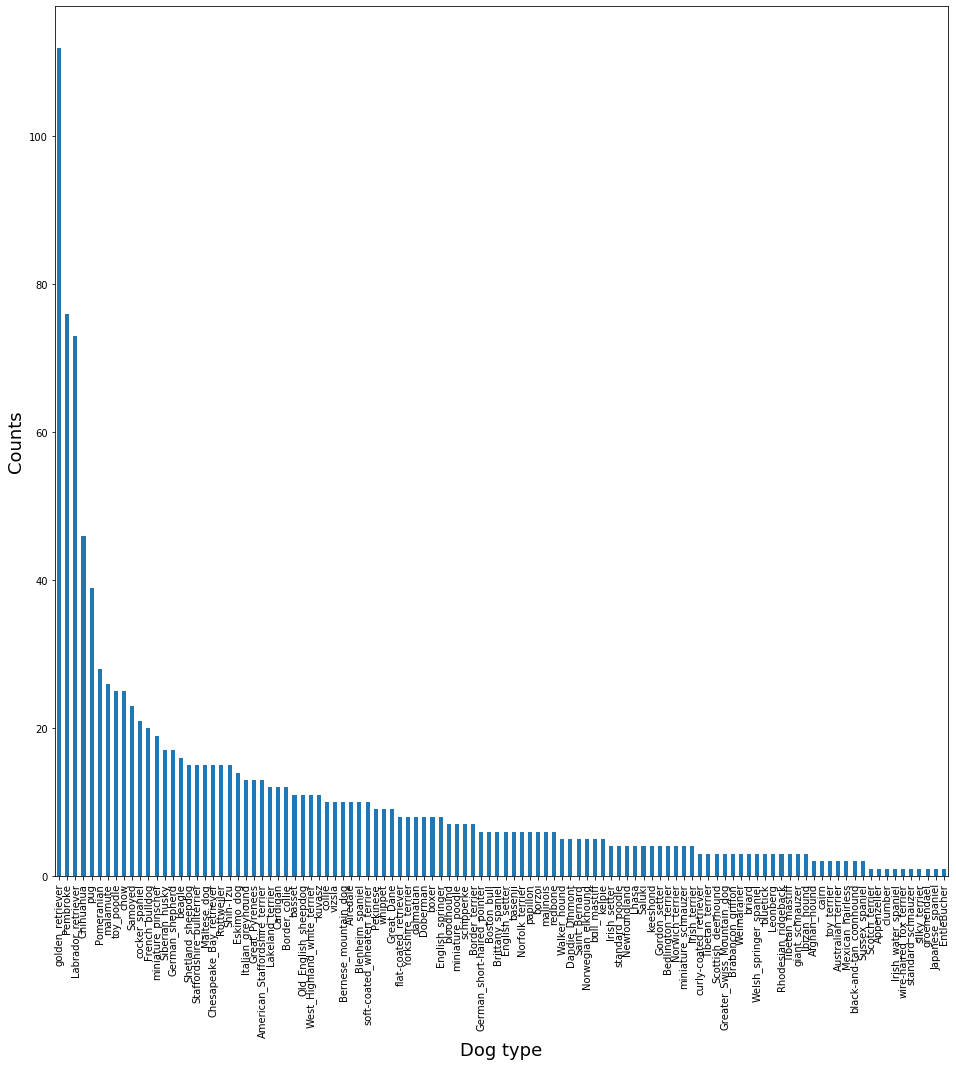

In [102]:
images_predict_clean.first_prediction.value_counts().plot(kind = 'bar' , figsize = (16,16));
plt.xlabel('Dog type', fontsize = 18);
plt.ylabel('Counts', fontsize = 18);

In [103]:
images_predict_clean.second_prediction.value_counts()

Labrador_retriever    66
Cardigan              62
golden_retriever      52
Chihuahua             31
French_bulldog        31
                      ..
affenpinscher          1
Japanese_spaniel       1
giant_schnauzer        1
komondor               1
standard_schnauzer     1
Name: second_prediction, Length: 112, dtype: int64

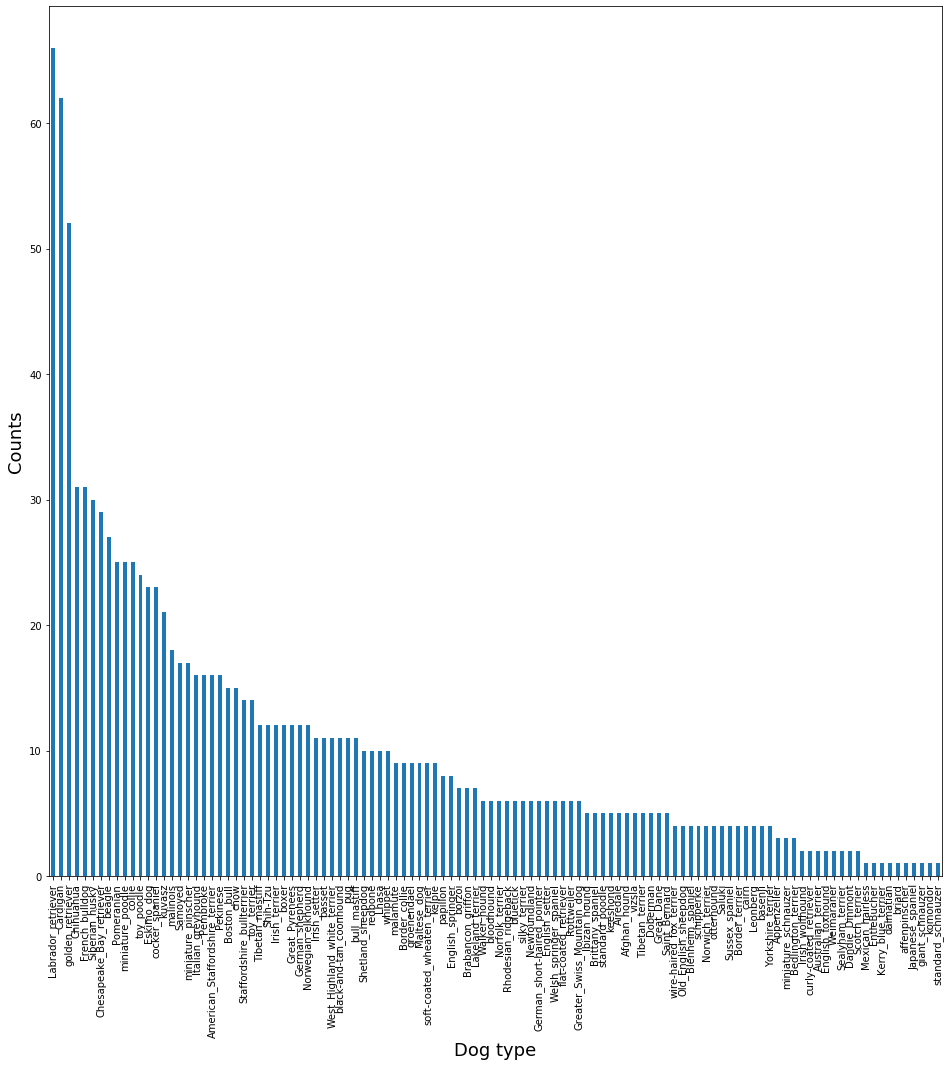

In [104]:
images_predict_clean.second_prediction.value_counts().plot(kind = 'bar' , figsize = (16,16));
plt.xlabel('Dog type', fontsize = 18);
plt.ylabel('Counts', fontsize = 18);

In [105]:
images_predict_clean.third_prediction.value_counts()

Labrador_retriever      60
Chihuahua               47
golden_retriever        32
Eskimo_dog              30
Pekinese                27
                        ..
affenpinscher            1
komondor                 1
Scottish_deerhound       1
Bernese_mountain_dog     1
standard_schnauzer       1
Name: third_prediction, Length: 116, dtype: int64

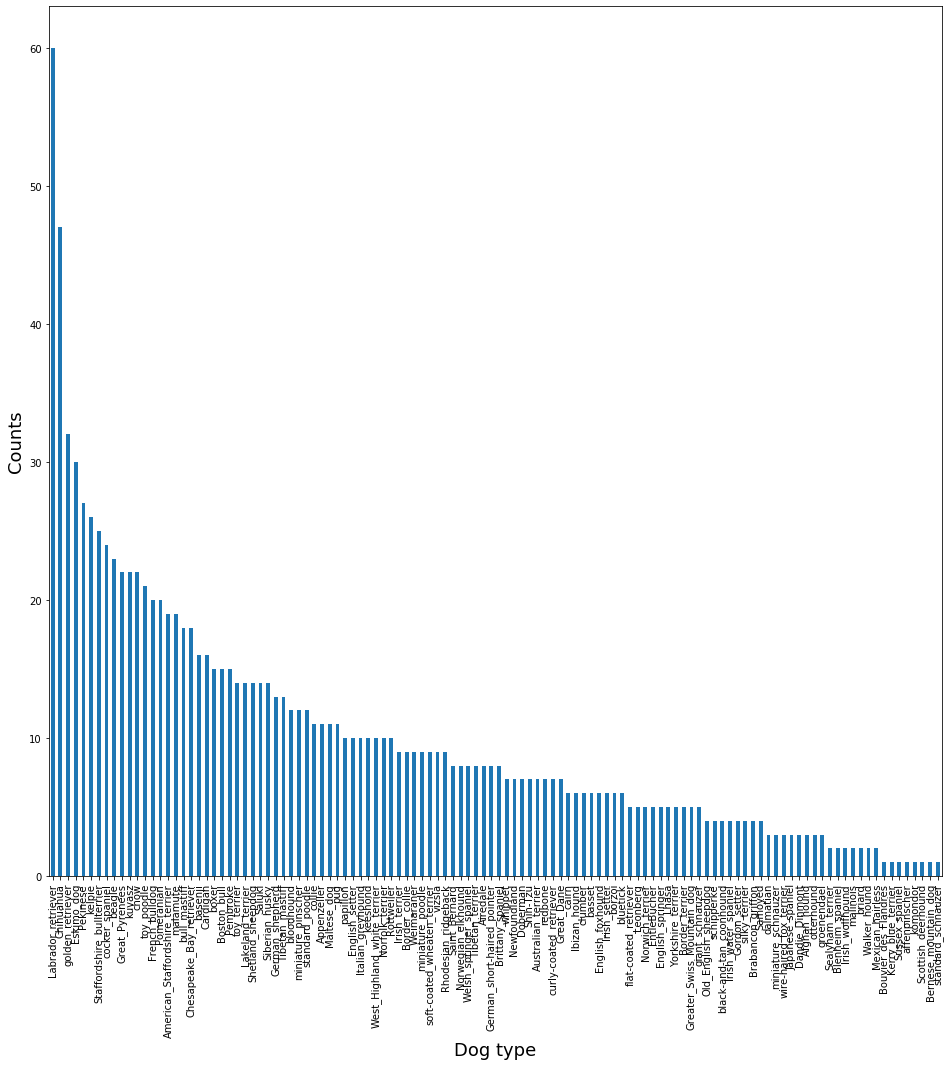

In [106]:
images_predict_clean.third_prediction.value_counts().plot(kind = 'bar' , figsize = (16,16));
plt.xlabel('Dog type', fontsize = 18);
plt.ylabel('Counts', fontsize = 18);

From the three bar charts for the counts of the dog types, we find that the most popular dog is the golden retriver.

In [107]:
clean_mergedd.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### 2- The most used source for the tweets is Twitter for Iphone and the leat used source is TweetDeck

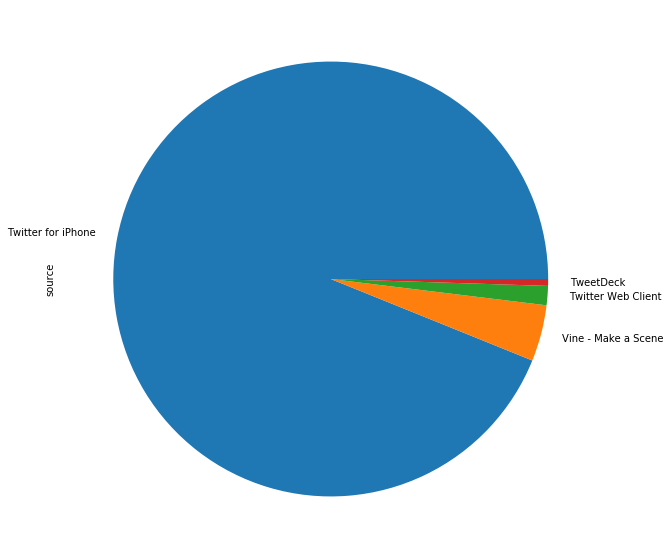

In [108]:
clean_mergedd['source'].value_counts().plot(kind = 'pie', figsize = (10,10));

### 3- The second most favourited dog

In [109]:
from PIL import Image
from io import BytesIO
all_merged_clean.sort_values(by = 'favorite_count',ascending = False,inplace = True)

In [110]:
all_merged_clean.favorite_count.head()

862    153958.0
348    131334.0
445    118890.0
119    114995.0
901    113822.0
Name: favorite_count, dtype: float64

In [111]:
all_merged_clean.loc[:,['favorite_count','jpg_url','rating_numerator']]

favorite_count                                            jpg_url  \
862         153958.0                                                NaN   
348         131334.0    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg   
445         118890.0                                                NaN   
119         114995.0    https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg   
901         113822.0  https://pbs.twimg.com/ext_tw_video_thumb/73923...   
...              ...                                                ...   
252              NaN    https://pbs.twimg.com/media/C57sMJwXMAASBSx.jpg   
305              NaN                                                NaN   
606              NaN    https://pbs.twimg.com/media/CtAAYizW8AAWzBZ.jpg   
760              NaN    https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg   
1547             NaN    https://pbs.twimg.com/media/CW-ZRC_WQAAyFrL.jpg   

      rating_numerator  
862                 13  
348                 13  
445                 13  
119                 13  
901                 13  
...                ...  
252                 13  
305                 13  
606                 12  
760                 12  
1547                10  

[2175 rows x 3 columns]

In [112]:
url = all_merged_clean['jpg_url'][348]

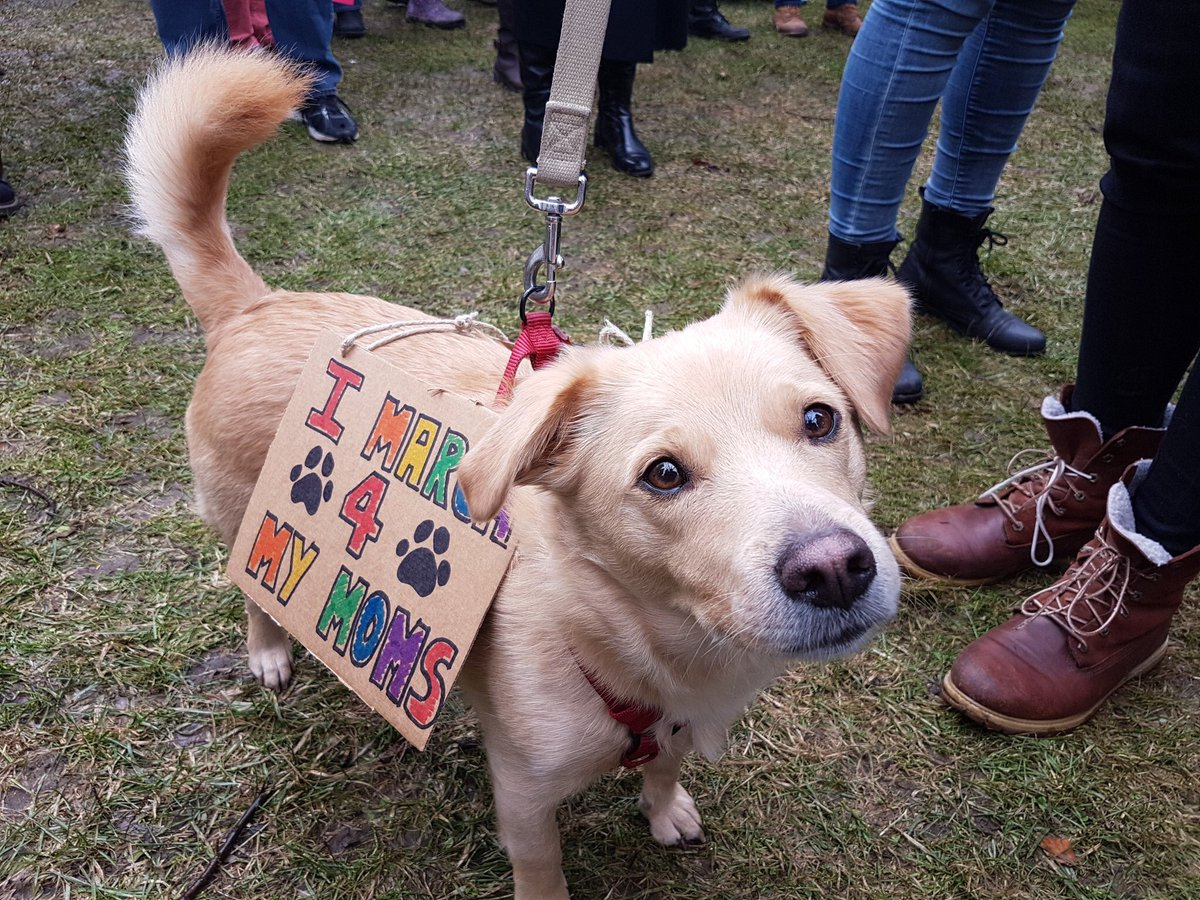

In [113]:
response = requests.get(url)
Image.open(BytesIO(response.content))

### 4- The most used name is ...

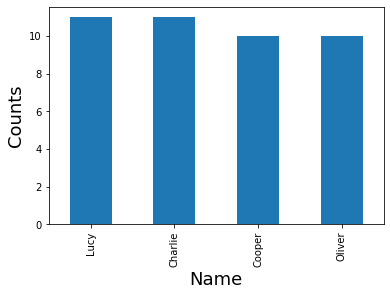

In [114]:
all_merged_clean.name.value_counts()[:4].plot(kind = 'bar');
plt.xlabel('Name', fontsize = 18);
plt.ylabel('Counts', fontsize = 18);

### Charlie

### 5- Positive correlation between favorite_count and retweet_count

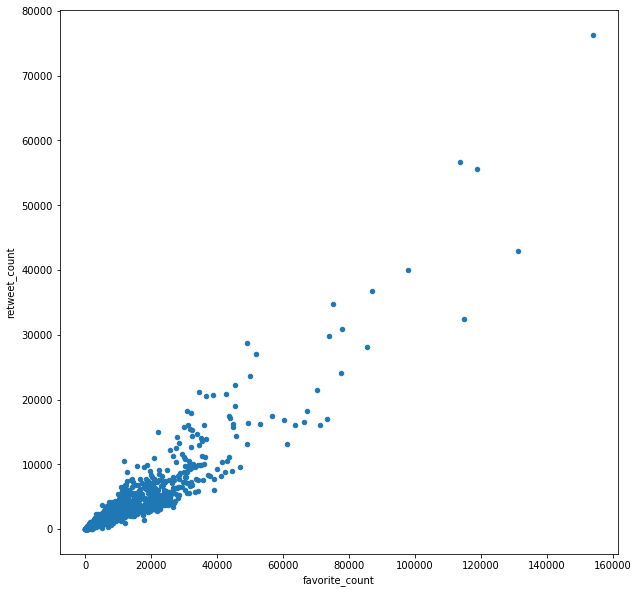

In [115]:
all_merged_clean.plot(x = 'favorite_count' , y = 'retweet_count' , kind = 'scatter' , figsize= (10,10));

### 6- The highest prediction confidences is for the first algorithm used.

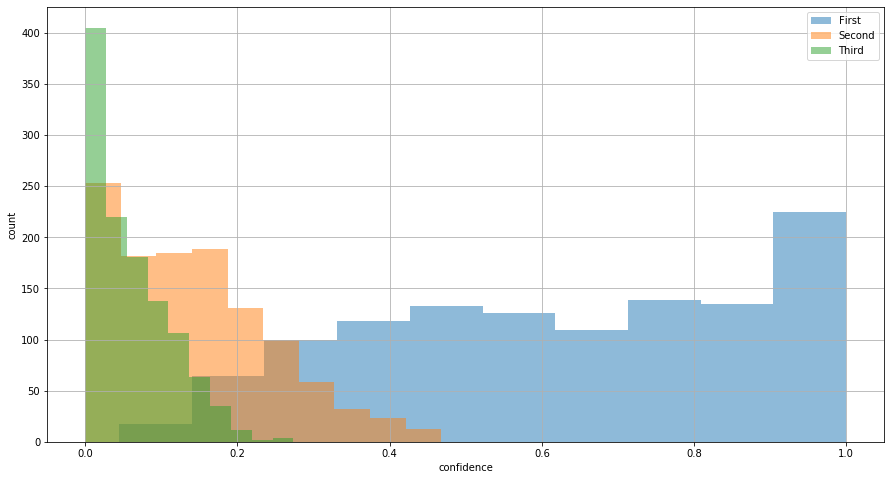

In [117]:
fig , ax = plt.subplots(figsize = (15,8))
all_merged_clean.first_predic_confidence.hist(alpha = 0.5 , bins = 10 , label = 'First')
all_merged_clean.second_predic_confidence.hist(alpha = 0.5 , bins = 10 , label = 'Second')
all_merged_clean.third_predic_confidence.hist(alpha = 0.5 , bins = 10 , label = 'Third');
plt.xlabel('confidence');
plt.ylabel('count');
plt.legend();

### 7- The most retweeted tweet

In [118]:
all_merged_clean.sort_values(by = 'retweet_count',ascending = False,inplace = True)

In [119]:
all_merged_clean.retweet_count.head()

862    76281.0
901    56732.0
445    55603.0
348    42982.0
63     39961.0
Name: retweet_count, dtype: float64

In [120]:
url = all_merged_clean['tweet_url'][862]
url

'https://t.co/7wE9LTEXC4'

In [121]:
import webbrowser  
webbrowser.open(url, new=0, autoraise=True)

True